## Data curating of the csv file. 


### Here we divide data beetween test and train fill missing data...

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [2]:
BASE_PATH='cell_image'
ANNOT_FILE='cell_image.csv'

ANNOT_PATH = os.path.sep.join([BASE_PATH,ANNOT_FILE])
IMAGES_PATH = os.path.sep.join([BASE_PATH,'gazo'])
data = pd.read_csv(ANNOT_PATH)
data.head()

image_filename                                         image_path  cell_no  \
0    AES0001.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0001   
1    AES0002.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0002   
2    AES0003.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0003   
3    AES0004.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0004   
4    AES0005.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0005   

  Cell name                                      Cell grouping Classification  \
0       H-1  Animal ES cell lines and germline stem cell lines             ES   
1    GS-DG1  Animal ES cell lines and germline stem cell lines             ES   
2     B6G-2  Animal ES cell lines and germline stem cell lines             ES   
3  mGS-DBA1  Animal ES cell lines and germline stem cell lines             ES   
4      BRC1  Animal ES cell lines and germline stem cell lines             ES   

  Morphology Animal Genus Species    Strain name                Tissue  \
0    ES-like  mouse   NaN     NaN            C3H  embryonic stem cells   
1    ES-like  mouse   NaN     NaN          DBA/2                testis   
2    ES-like  mouse   NaN     NaN        C57BL/6  embryonic stem cells   
3    ES-like  mouse   NaN     NaN          DBA/2                testis   
4    ES-like  mouse   NaN     NaN  B6D2F1x129/sv  embryonic stem cells   

   Lifespan  
0  infinite  
1  infinite  
2  infinite  
3  infinite  
4  infinite

In [3]:
data.shape

(2807, 13)

*Finding duplicates* 

In [4]:
data.duplicated(subset="image_filename").sum() #no dulicates:

0

In [5]:
data.drop_duplicates().shape

(2807, 13)

*Count the number of files that are missing in the image folder*

In [6]:
count_missing=0
for index, row in data.iterrows():
    file_name = os.path.sep.join([IMAGES_PATH,row["image_filename"]])
    if not os.path.exists(file_name):
        count_missing+=1        
        print( file_name + ' do not exists')

print( str(count_missing) +' files, do not exists')        

0 files, do not exists


In [7]:
X_train, X_test = train_test_split(data,test_size=0.2)

In [8]:
X_train.shape

(2245, 13)

In [9]:
X_test.shape

(562, 13)

In [10]:
X_train.head()

image_filename                                         image_path  \
670     HPS0178.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
563     HEV0410.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
2372  RCB2537_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
666     HPS0174.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1120    RCB0001.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   

      cell_no Cell name                                      Cell grouping  \
670   HPS0178       NaN                                    Human iPS cells   
563   HEV0410       NaN  EBV transformed B cell lines derived from Japa...   
2372  RCB2537     TFK-1                                 General cell lines   
666   HPS0174       NaN                                    Human iPS cells   
1120  RCB0001      Vero                                 General cell lines   

     Classification       Morphology  Animal          Genus   Species  \
670             iPS          ES-like   human           Homo   sapiens   
563     transformed  lymphocyte-like   human           Homo   sapiens   
2372         cancer  epithelial-like   human           Homo   sapiens   
666             iPS          ES-like   human           Homo   sapiens   
1120          other  epithelial-like  monkey  Cercopithecus  aethiops   

        Strain name                        Tissue  Lifespan  
670             NaN                          skin  infinite  
563             NaN  peripheral blood lymphocytes  infinite  
2372            NaN              common bile duct  infinite  
666             NaN                          skin  infinite  
1120  African green                        kidney  infinite

In [11]:
X_train.to_csv(os.path.sep.join([BASE_PATH,'cell_train.csv']),index=False, columns=['image_filename', 'Classification'])

In [12]:
X_test.to_csv(os.path.sep.join([BASE_PATH,'cell_test.csv']),index=False)

Some columns have missing data, fill them out.

In [13]:
BASE_PATH='cell_image'
ANNOT_FILE='cell_image_temp.csv'

ANNOT_PATH = os.path.sep.join([BASE_PATH,ANNOT_FILE])

data = pd.read_csv(ANNOT_PATH)
data.head()

image_filename                                         image_path  cell_no  \
0    AES0001.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0001   
1    AES0002.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0002   
2    AES0003.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0003   
3    AES0004.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0004   
4    AES0005.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...  AES0005   

  Cell name                                      Cell grouping Classification  \
0       H-1  Animal ES cell lines and germline stem cell lines             ES   
1    GS-DG1  Animal ES cell lines and germline stem cell lines             ES   
2     B6G-2  Animal ES cell lines and germline stem cell lines             ES   
3  mGS-DBA1  Animal ES cell lines and germline stem cell lines             ES   
4      BRC1  Animal ES cell lines and germline stem cell lines             ES   

  Morphology Animal Genus Species    Strain name                Tissue  \
0    ES-like  mouse   NaN     NaN            C3H  embryonic stem cells   
1    ES-like  mouse   NaN     NaN          DBA/2                testis   
2    ES-like  mouse   NaN     NaN        C57BL/6  embryonic stem cells   
3    ES-like  mouse   NaN     NaN          DBA/2                testis   
4    ES-like  mouse   NaN     NaN  B6D2F1x129/sv  embryonic stem cells   

   Lifespan  
0  infinite  
1  infinite  
2  infinite  
3  infinite  
4  infinite

### Cleaning NaN in the data

In [14]:
data.isna().any()

image_filename    False
image_path        False
cell_no           False
Cell name          True
Cell grouping     False
Classification     True
Morphology        False
Animal            False
Genus              True
Species            True
Strain name        True
Tissue            False
Lifespan          False
dtype: bool

Classification column has NaN Values

In [15]:
data.isna().sum()

image_filename       0
image_path           0
cell_no              0
Cell name          610
Cell grouping        0
Classification       3
Morphology           0
Animal               0
Genus              804
Species            807
Strain name       2228
Tissue               0
Lifespan             0
dtype: int64

Classification, morphology and Animal looks like good columns to classify 

In [16]:
import numpy as np
indices = np.where(data['Classification'].isna())

In [17]:
indices

(array([ 61,  62, 784]),)

In [18]:
data.loc[[61,62,784]]

image_filename                                         image_path  \
61     AES0136.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
62     AES0137.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
784    HPS0848.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   

     cell_no Cell name                                      Cell grouping  \
61   AES0136    ZHBTc4  Animal ES cell lines and germline stem cell lines   
62   AES0137     ZHTc6  Animal ES cell lines and germline stem cell lines   
784  HPS0848       NaN                                    Human iPS cells   

    Classification Morphology Animal Genus  Species Strain name  \
61             NaN    ES-like  mouse   NaN      NaN     129/Ola   
62             NaN    ES-like  mouse   NaN      NaN     129/Ola   
784            NaN    ES-like  human  Homo  sapiens         NaN   

                   Tissue  Lifespan  
61   embryonic stem cells  infinite  
62   embryonic stem cells  infinite  
784                  skin  infinite

### Since at the right says ES-Like were're going to fill with ES and iPS.

In [19]:
temp=data
temp.loc[61,'Classification'] = 'ES'
temp.loc[62,'Classification'] = 'ES'
temp.loc[784,'Classification'] = 'iPS'
temp.loc[[61,62,784]]

### We can also, delete the rows instead 

In [27]:
temp = data

temp = temp.drop(temp.index[indices])

indices = np.where(temp['Classification'].isna())

indices

(array([], dtype=int64),)

In [28]:
temp.to_csv(os.path.sep.join([BASE_PATH,'cell_image_nonan.csv']),index=False)

### Counting classes type per column

In [33]:
temp.Classification.value_counts()

transformed     923
cancer          877
iPS             262
normal          181
hybrid cells    165
other           125
ES              118
mutant          114
semi-normal      39
Name: Classification, dtype: int64

In [34]:
temp.Morphology.value_counts()

lymphocyte-like     1100
epithelial-like      545
fibroblast-like      462
ES-like              378
other                269
lymphoblast-like      50
Name: Morphology, dtype: int64

In [36]:
temp.Animal.value_counts()

human            1813
mouse             481
rat               147
mouse x mouse     137
avian              60
hamster            33
mouse x rat        28
monkey             15
rabbit             14
medaka             13
bovine              9
gold fish           8
silkworm            7
frog                7
dog                 5
elephant            4
pig                 3
eel                 3
chimpanzee          2
cat                 2
mink                2
armyworm            2
human x human       2
Drosophila          1
newt                1
zebrafish           1
marmoset            1
salamander          1
butterfly           1
Mudminnow           1
Name: Animal, dtype: int64

In [37]:
temp.Tissue.value_counts()

peripheral blood lymphocytes           685
skin                                   266
hybridoma                              146
embryo                                 114
lung                                    97
kidney                                  78
embryonic stem cells                    72
peripheral  blood mononuclear cell      62
B cell                                  60
colon                                   54
embryo/fetus, whole                     54
blood                                   51
ovary                                   44
bone marrow                             40
liver                                   40
cervix                                  38
Peripheral blood lymphocytes            32
peripheral blood                        26
mammary gland                           25
brain                                   24
blood mononuclear cell                  24
pancreas                                23
tail (possibly fibroblast)              22
stomach    

In [38]:
temp.Lifespan.value_counts()

infinite    2627
finite       174
unknown        3
Name: Lifespan, dtype: int64

### Important! 
Keras doesn't load all images of your csv file have several columns. So we only save the column of our interest

In [29]:
X_train, X_test = train_test_split(temp,test_size=0.2)
X_train.to_csv(os.path.sep.join([BASE_PATH,'cell_train.csv']),index=False, columns=['image_filename', 'Classification'])
X_test.to_csv(os.path.sep.join([BASE_PATH,'cell_test.csv']),index=False, columns=['image_filename', 'Classification'])

### Does train and test files have the same number of classes?

In [30]:
X_train.Classification.value_counts()

transformed     749
cancer          692
iPS             204
normal          150
hybrid cells    130
other           100
ES               94
mutant           89
semi-normal      35
Name: Classification, dtype: int64

In [31]:
X_test["Classification"].value_counts()

cancer          185
transformed     174
iPS              58
hybrid cells     35
normal           31
other            25
mutant           25
ES               24
semi-normal       4
Name: Classification, dtype: int64

The number of data for each class is test data is aprox the 10%. Good :hankey: .


In [29]:
temp.Classification.value_counts()

transformed     923
cancer          877
iPS             263
normal          181
hybrid cells    165
other           125
ES              120
mutant          114
semi-normal      39
Name: Classification, dtype: int64

In [30]:
classes =temp.Classification.value_counts()

The number of data for each class varies to much. For DL we need the same number for each class.  

In [31]:
temp.Morphology.value_counts()

lymphocyte-like     1100
epithelial-like      545
fibroblast-like      462
ES-like              381
other                269
lymphoblast-like      50
Name: Morphology, dtype: int64

The same problem..

### Split the cell_train.csv into train and validation
This because the train split validation from keras is missing some classes when doing the validation_split

In [35]:
X_train_train, X_val = train_test_split(X_train,test_size=0.25)
X_train_train.to_csv(os.path.sep.join([BASE_PATH,'cell_train_train.csv']),index=False, columns=['image_filename', 'Classification'])
X_val.to_csv(os.path.sep.join([BASE_PATH,'cell_validation.csv']),index=False, columns=['image_filename', 'Classification'])

In [36]:
X_train_train["Classification"].value_counts()

transformed     634
cancer          611
iPS             167
normal          119
hybrid cells    105
other            83
ES               76
mutant           73
semi-normal      26
Name: Classification, dtype: int64

In [37]:
X_val["Classification"].value_counts()

transformed     203
cancer          181
iPS              59
hybrid cells     47
normal           46
ES               31
mutant           29
other            28
semi-normal       8
Name: Classification, dtype: int64

### *

In [ ]:
data['Classification'].value_counts()

In [6]:
data[data['Classification']=='semi-normal']

image_filename                                         image_path  \
1122    RCB0005.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1142    RCB0043.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1150    RCB0097.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1151  RCB0097_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1155    RCB0112.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1215    RCB0288.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1216  RCB0288_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1217    RCB0289.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1218  RCB0289_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1219    RCB0290.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1220  RCB0290_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1239    RCB0323.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1240  RCB0323_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1268    RCB0432.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1269  RCB0432_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1589    RCB1279.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1590  RCB1279_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1591  RCB1279_2.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1616    RCB1311.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1617  RCB1311_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1618    RCB1312.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1619  RCB1312_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1669    RCB1485.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1686    RCB1518.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1692    RCB1536.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1693  RCB1536_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1695    RCB1541.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1696  RCB1541_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1697    RCB1542.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1779    RCB1691.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1780  RCB1691_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1781    RCB1692.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1851    RCB1829.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1853    RCB1831.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1855    RCB1833.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1856    RCB1834.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
1941    RCB1927.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
2716    RCB3706.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   
2717  RCB3706_1.jpg  http://cellbank.brc.riken.jp/cell_bank/Upload/...   

      cell_no            Cell name       Cell grouping Classification  \
1122  RCB0005   BALB/3T3 clone A31  General cell lines    semi-normal   
1142  RCB0043                  NRK  General cell lines    semi-normal   
1150  RCB0097                  CHL  General cell lines    semi-normal   
1151  RCB0097                  CHL  General cell lines    semi-normal   
1155  RCB0112               NRK49F  General cell lines    semi-normal   
1215  RCB0288    3Y1-B clone 1-6-2  General cell lines    semi-normal   
1216  RCB0288    3Y1-B clone 1-6-2  General cell lines    semi-normal   
1217  RCB0289  3Y1-B cl 1-6-K5-4-2  General cell lines    semi-normal   
1218  RCB0289  3Y1-B cl 1-6-K5-4-2  General cell lines    semi-normal   
1219  RCB0290        3Y1-B clone 1  General cell lines    semi-normal   
1220  RCB0290        3Y1-B clone 1  General cell lines    semi-normal   
1239  RCB0323            3Y1-SB-15  General cell lines    semi-normal   
1240  RCB0323            3Y1-SB-15  General cell lines    semi-normal   
1268  RCB0432         

## Croping images
This crops the logo area

In [65]:
def crop_image(file_name, y_up = 77, y_down = 691 ):
    img = cv2.imread(file_name)
    crop_img = img[y_up:y_down,:]
    return crop_img

def crop_images_dir(dir_name_in,dir_name_out):
    if not os.path.exists(dir_name_in):
        print("The dir " + dir_name_in + ' it doesn\'t exist')
        return
        
    if not os.path.exists(dir_name_out):
        os.makedir(dir_name_out)
        
    for file_name in os.listdir(dir_name_in):
        crop_img = crop_image(os.path.join(dir_name_in, file_name))
        cv2.imwrite(os.path.join(dir_name_out,file_name), crop_img)       
    

In [66]:
IMG_DIR = 'cell_image/gazo'
IMG_CROP = 'cell_image/crop_images'

crop_images_dir(IMG_DIR,IMG_CROP)

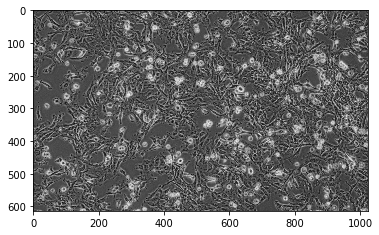

True

In [63]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img_name = "cell_image/crop_images/RCB0450.jpg"
img = cv2.imread(img_name)
crop_img = crop_image(img_name)
plt.figure(1)
plt.imshow(img) #1024 x 767
plt.figure(2)
plt.imshow(crop_img)
plt.show()
cv2.imwrite('cell_image/crop_images/RCB0450_crop.jpg',crop_img)

## Data augmentation
We create new data for the classes that have very few examples

In [1]:
import random
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from albumentations import (
    ElasticTransform,
    Compose,
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    RandomRotate90,
    Compose,
    Transpose,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomGamma 
)
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(20, 20))
    plt.imshow(image)

In [2]:
aug = Compose([   
 #   VerticalFlip(p=0.5),              
 #   RandomRotate90(p=0.5),
    ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
 #   CLAHE(p=0.8),
  #  RandomContrast(p=0.8),
  #  RandomBrightness(p=0.8),
   # RandomGamma(p=0.8)
])

In [3]:
img_name = "RCB0450.jpg"
image = cv2.imread(img_name)

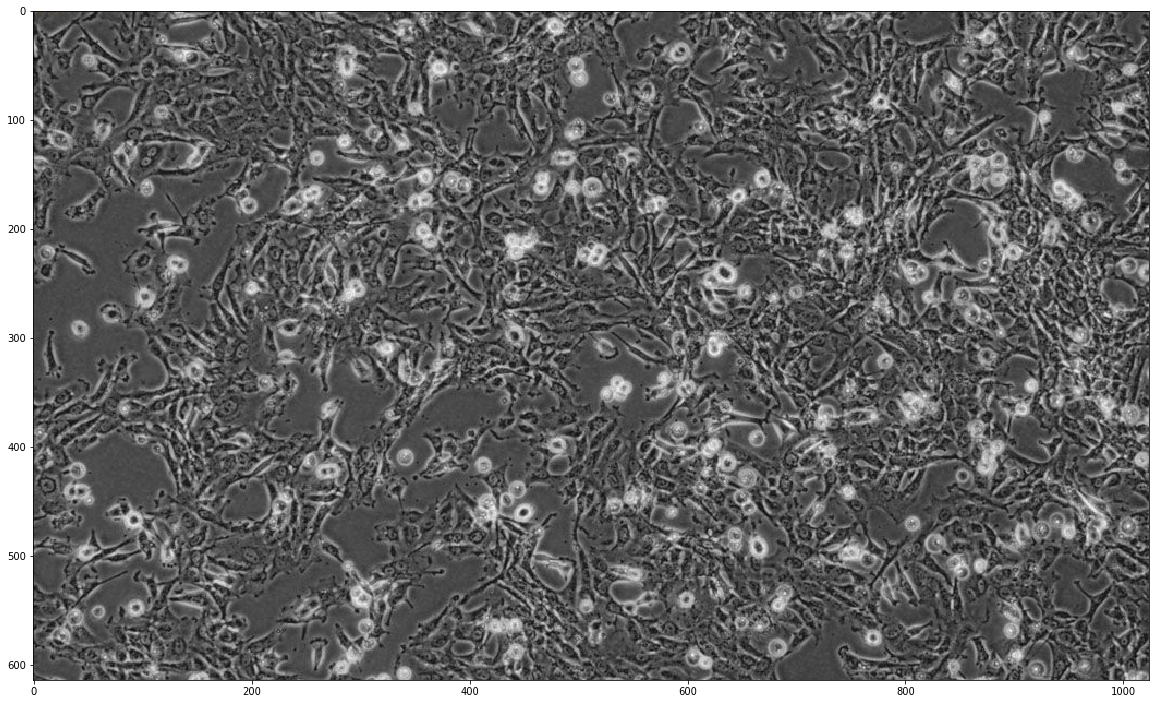

In [4]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.show()

In [12]:
aug = ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.06, alpha_affine=120 * 0.03)
augment_and_show(aug, image)

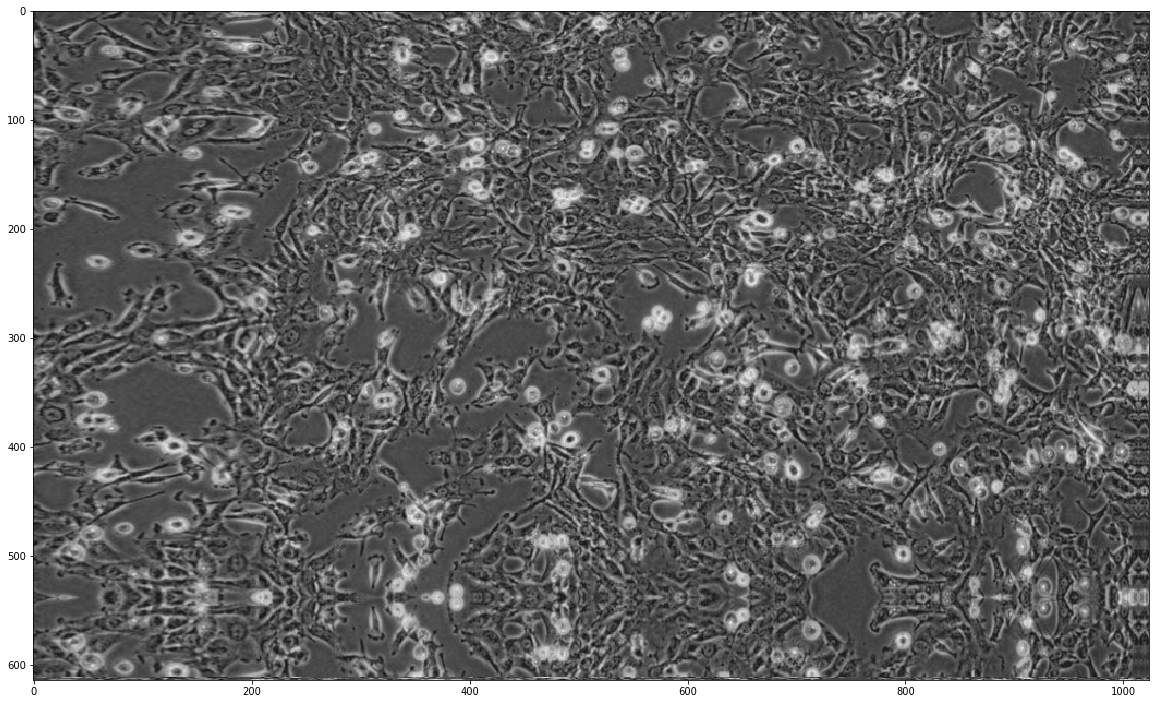

In [13]:
aug = GridDistortion(p=1)
augment_and_show(aug, image)
#Yes the reflextion in thebottom looks interesting

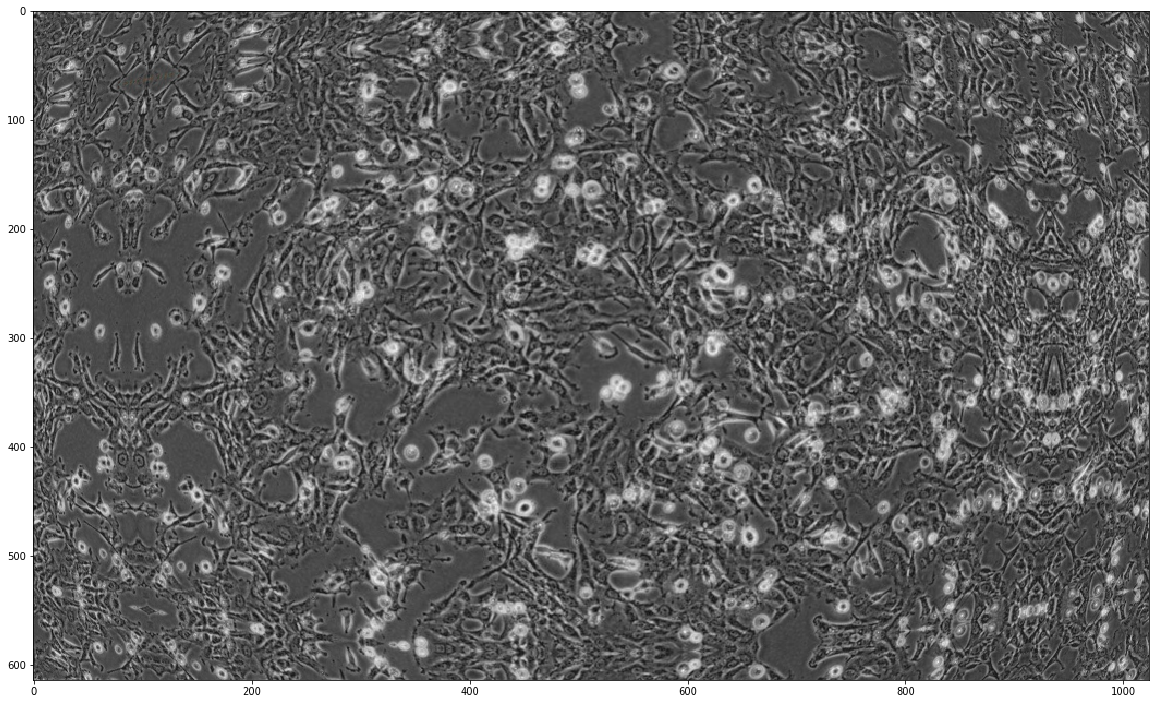

In [14]:
aug = OpticalDistortion(p=1, distort_limit=1.5, shift_limit=0.5)
augment_and_show(aug, image) #Yes, Looks like this creates 'new areas' 

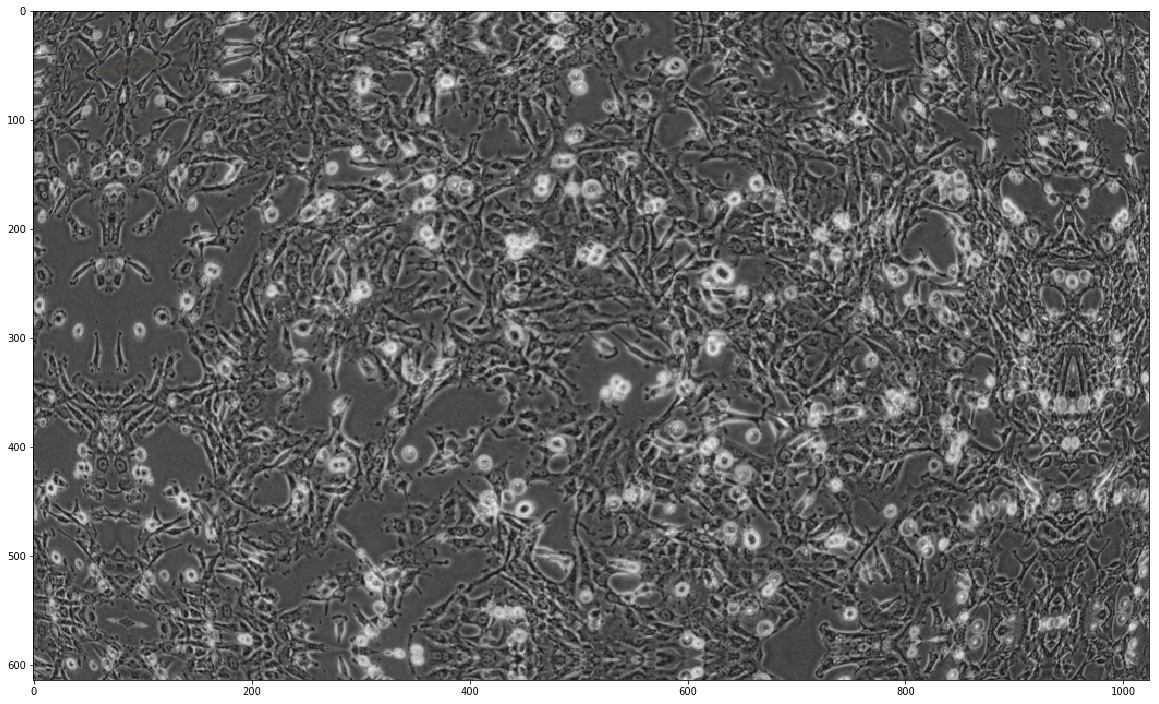

In [15]:
aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
augment_and_show(aug, image) #Yes, Looks like this creates 'new areas' altough sometimes creates aweirds effect lika lense

In [16]:
original_height, original_width = image.shape[:2]

image.shape[:2]

(614, 1024)

In [44]:
aug = RandomSizedCrop(p=1, min_max_height=(500, 600), height=original_height, width=original_width)
augment_and_show(aug, image)# Good 

Images with underscore 'RCB0450_1.jpg' seems to be a crop of the images without crop 'RCB0450.jpg' 

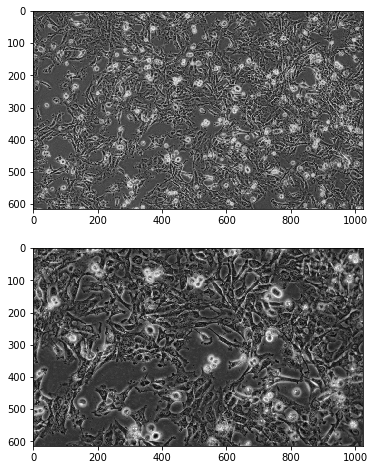

In [18]:
image_ = cv2.imread("RCB0450_1.jpg")
f, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].imshow(image)
ax[1].imshow(image_)

In [23]:
aug = Compose([
RandomSizedCrop(min_max_height=(500, 600), height=original_height, width=original_width, p=0.2),
VerticalFlip(p=0.5),
HorizontalFlip(p=0.5),    
RandomRotate90(p=0.5),
OneOf([
        ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.06, alpha_affine=120 * 0.03),
        GridDistortion(p=0.5),
        #OpticalDistortion(p=0.5, distort_limit=1.7, shift_limit=0.5)                
        ], p=0.8)])

In [27]:
augment_and_show(aug, image)

For each class we are going to create a folder that can will  be augmented

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [6]:
data = pd.read_csv('cell_image/cell_train_train.csv')
data.head()

image_filename Classification
0  RCB0676_1.jpg   hybrid cells
1    HEV0351.jpg    transformed
2    AES0044.jpg             ES
3    RCB4455.jpg         cancer
4    HEV0039.jpg    transformed

In [7]:
data['Classification'].value_counts()

transformed     634
cancer          611
iPS             167
normal          119
hybrid cells    105
other            83
ES               76
mutant           73
semi-normal      26
Name: Classification, dtype: int64

In [8]:
criteria = data['Classification'] == 'semi-normal'
files_list=data[criteria]['image_filename'].values

In [9]:
#These dimensions were inspecting the image
original_height, original_width = (614, 1024)

aug = Compose([
RandomSizedCrop(min_max_height=(500, 600), height=original_height, width=original_width, p=0.2),
VerticalFlip(p=0.5),
HorizontalFlip(p=0.5),    
RandomRotate90(p=0.5),
OneOf([
        ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.06, alpha_affine=120 * 0.03),
        GridDistortion(p=0.5),
        #OpticalDistortion(p=0.5, distort_limit=1.7, shift_limit=0.5)                
        ], p=0.8)])

def augment_and_save(aug, image,imageout_name='',ext='jpg'):
    image = aug(image=image)['image']
    if imageout_name == '' :
        imageout_name = str(random.randint(0,10000))+'_aug.' + ext 
        
    cv2.imwrite(imageout_name,image)
    
#Agument the given class in the given column a save the augmente images in
#images_dir_out
def augment_column_create_dir(csv_file, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches=5):
    
    #Read file names from the csv 
    data = pd.read_csv(csv_file)
    criteria = data[column] == class_to_augment
    files_list=data[criteria]['image_filename'].values
    
    if not os.path.exists(images_dir_out):
        os.makedirs(images_dir_out)
        
    if not os.path.exists(images_dir_in):
        print('Images dir in doesn\'t  exist')
        return    
    for filename in files_list:
        img = cv2.imread(os.path.join(images_dir_in,filename))
        if img is not None: #File exist?
            #First just copy the file no augment
            original_file = os.path.sep.join([images_dir_out,filename])
            cv2.imwrite(original_file,img)
            
            s = filename.split('.')
            for i in range(0, batches): # Create the augmente files
                imageout_name = s[0]+'_'+str(random.randint(0,10000))+'_aug.'+s[1]
                imageout_name = os.path.sep.join([images_dir_out , imageout_name]) 
                augment_and_save(aug,img,imageout_name)
    

#### We copy and augment each class from the train data

In [10]:
BASE_PATH = 'cell_image'
CSV_FILE = os.path.sep.join([BASE_PATH,'cell_train_train.csv'])
column = 'Classification'
images_dir_in = os.path.sep.join([BASE_PATH,'crop_images'])
# transformed     634
# cancer          611
# iPS             167
# normal          119
# hybrid cells    105
# other            83
# ES               76
# mutant           73
# semi-normal      26

In [11]:
classes = data['Classification'].unique()
banned_classes= ['other','hybrid cells']
classes2 = [a for a in classes if a not in banned_classes ]
classes2

['transformed', 'ES', 'cancer', 'iPS', 'mutant', 'normal', 'semi-normal']

In [14]:
a = data['Classification'].value_counts()
a = a.to_dict()
map(a.pop,banned_classes)
maximum = max(a.values()) 
for class_, tam in a.iteritems():
    print(str(int(maximum/tam)))
#     print(tam)
print('max:' + str(maximum))

8
1
5
3
1
24
8
max:634


In [48]:
class_to_augment = 'semi-normal'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/26)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'mutant'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/73)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'ES'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/76)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'hybrid cells'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/105)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'normal'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/119)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'iPS'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= int(634/167)
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'cancer'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= 0 # No agumentation just copy them
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)

class_to_augment = 'transformed'
images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'train',class_to_augment])
batches= 0 # No agumentation just copy them
augment_column_create_dir(CSV_FILE, 
                              column,
                              class_to_augment,
                              images_dir_in, images_dir_out, batches)


#### Now we copy the validation set in a directory

In [50]:
BASE_PATH = 'cell_image'
CSV_FILE = os.path.sep.join([BASE_PATH,'cell_validation.csv'])
column = 'Classification'
images_dir_in = os.path.sep.join([BASE_PATH,'crop_images'])

In [51]:
data = pd.read_csv(CSV_FILE)
data.head()

image_filename Classification
0    HPS0247.jpg            iPS
1  HEV0444_1.jpg    transformed
2    RCB2660.jpg          other
3    RCB0466.jpg         cancer
4    HEV0188.jpg    transformed

In [52]:
classes_count = data['Classification'].value_counts()
type(classes_count)

pandas.core.series.Series

In [53]:
#Copy validation set from csv
batches = 0 # Just copy, don't augment
for (index,values) in classes_count.iteritems():
    print('Copying '+ index + ' with ' + str(values) + ' images...')
    class_to_augment = index
    images_dir_out = os.path.sep.join([BASE_PATH,'aug_images',column,'validation',class_to_augment])
    augment_column_create_dir(CSV_FILE, 
                                  column,
                                  class_to_augment,
                                  images_dir_in, images_dir_out, batches)
    
#### Remember to delete other folder!!    

Copying transformed with 203 images...
Copying cancer with 181 images...
Copying iPS with 59 images...
Copying hybrid cells with 47 images...
Copying normal with 46 images...
Copying ES with 31 images...
Copying mutant with 29 images...
Copying other with 28 images...
Copying semi-normal with 8 images...
